# Trust

Trust ($t$) establishes a relationship between a signal ($x$) and a perceived probability of collaboration ($p$).

The signal $x\in\left[0,1\right]$ indicates the partner's stated probability of collaboration.

The trust $t\geq 0$ indicates the level of confidence in the signal accuracy.

The distribution of $p$ is modeled as a Beta distribution with parameters $\alpha$ and $\beta$ where:

$\begin{cases} x = \frac{\alpha-1}{\alpha+\beta-2} \\ t=\alpha+\beta-2 \end{cases} \iff \begin{cases} \alpha = 1 + x\cdot t \\ \beta = 1 + (1-x)\cdot t \end{cases}$

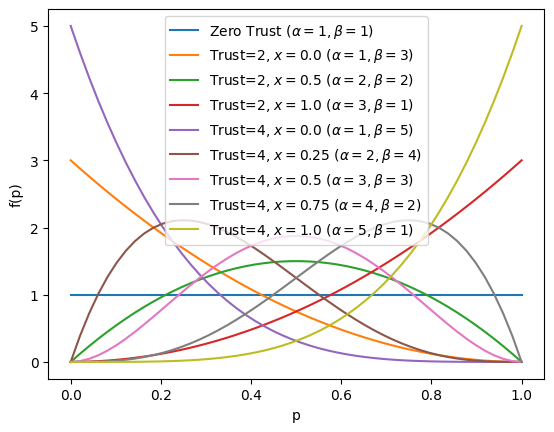

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

p = np.linspace(0, 1)

plt.plot(p, stats.beta.pdf(p, 1, 1), label="Zero Trust ($\\alpha=1, \\beta=1$)")
for i in range(0,3):
    plt.plot(p, stats.beta.pdf(p, 1+i, 3-i), label=f"Trust=2, $x={i/2}$ ($\\alpha={1+i}, \\beta={3-i}$)")
for i in range(0,5):
    plt.plot(p, stats.beta.pdf(p, 1+i, 5-i), label=f"Trust=4, $x={i/4}$ ($\\alpha={1+i}, \\beta={5-i}$)")
plt.xlabel("p")
plt.ylabel("f(p)")
plt.legend()

## Example

Consider the following strategic payoffs:

|      | Hare | Stag |
|:-----|:----:|:----:|
| Hare |  2   |  3   |
| Stag |  0   |  4   |

### Fixed $p$

Expected value of pure strategies:

$E[V|s=Hare] = 3\cdot p + 2\cdot (1-p) = 2 + p$

$E[V|s=Stag] = 4\cdot p + 0\cdot (1-p) = 4\cdot p$

Incentive function:

$D = E[V|s=Stag] - E[V|s=Hare] = 3 \cdot p - 2$

Expected value of a mixed strategy:

$\begin{aligned}E[V|s] &= s\cdot E[V|s=Stag] + (1-s)\cdot E[V|s=Hare] \\ &= s\cdot(4\cdot p) + (1-s)\cdot(2+p) \\ &=  2 + p + s\cdot (3\cdot p-2) \\ &= E[V|s=Hare] + s\cdot D \\ &= 2\cdot(1-s) + (1+3\cdot s)\cdot p \end{aligned}$


### Random $p$

$E[p] = \frac{\alpha}{\alpha + \beta} = \frac{1+x\cdot t}{2 + t}$

Expected value of pure strategies:

$E[V|s=Hare] = \int_0^1 \left( 2 + p \right) f(p) dp = 2 + \int_0^1 p\cdot f(p) dp = 2 + E[p]$

$E[V|s=Stag] = \int_0^1 \left( 4\cdot p \right) f(p) dp = 4\cdot E[p] $

Incentive function:

$D = E[V|s=Stag] - E[V|s=Hare] = \int_0^1 \left(3 \cdot p - 2\right) f(p) dp = 3\cdot E[p] - 2 $

Expected value of a mixed strategy:

$\begin{aligned} E[V|s] &= s\cdot E[V|s=Stag] + (1-s)\cdot E[V|s=Hare] \\ &= s\cdot\int_0^1 \left( 4\cdot p \right) f(p) dp + (1-s)\cdot\int_0^1 \left( 2 + p \right) f(p) dp \\ &=  \int_0^1 \left(2 + p\right) f(p) dp + s\cdot \int_0^1 \left(3 \cdot p - 2\right) f(p) dp \\ &= E[V|s=Hare] + s\cdot D  \\ &= 2\cdot(1-s) + (1+3\cdot s) \cdot \int_0^1 p \cdot f(p) dp \\ &= 2\cdot(1-s) + (1+3\cdot s) \cdot E[p] \end{aligned}$

C:\Users\pgrogan1\AppData\Local\Temp\ipykernel_44432\4214648011.py:39: RuntimeWarning: divide by zero encountered in reciprocal
  x_0 = (2 + np.reciprocal(t)) / 3


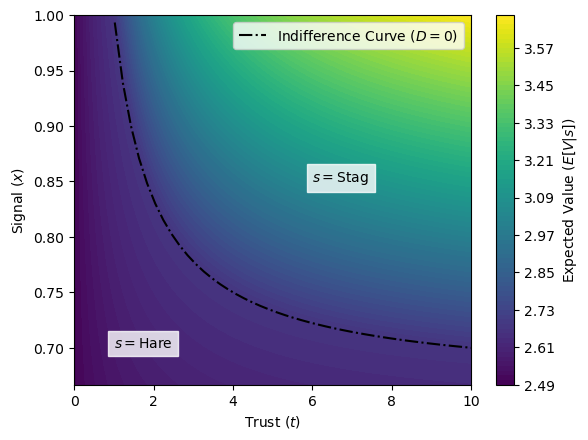

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# from scipy import integrate, optimize, stats

t = np.linspace(0, 10)
x = np.linspace(2/3, 1)
T, X = np.meshgrid(t, x)

EV_Hare = np.array([
  [
    # integrate.quad(lambda p: (2+p)*stats.beta.pdf(p, 1+X[i][j]*T[i][j], 1+(1-X[i][j])*T[i][j]), 0, 1)[0] 
    2 + (1 + X[i][j] * T[i][j]) / (2 + T[i][j])
    for j in range((len(t)))
  ] 
  for i in range(len(x))
])

EV_Stag = np.array([
  [
    # integrate.quad(lambda p: (4*p)*stats.beta.pdf(p, 1+X[i][j]*T[i][j], 1+(1-X[i][j])*T[i][j]), 0, 1)[0] 
    4 * (1 + X[i][j] * T[i][j]) / (2 + T[i][j])
    for j in range((len(t)))
  ] 
  for i in range(len(x))
])

# x_0 = np.array([
#   x.root if x.converged and x.root <= 1 else np.nan 
#   for t_i in t 
#   for x in [
#     optimize.root_scalar(
#       lambda x: integrate.quad(
#         lambda p: (3*p-2)*stats.beta.pdf(p, 1+x*t_i, 1+(1-x)*t_i), 0, 1
#       )[0], 
#       x0=0.5
#     )
#   ]
# ])
x_0 = (2 + np.reciprocal(t)) / 3
x_0[x_0 > 1] = np.nan

plt.contourf(T, X, np.maximum(EV_Hare, EV_Stag), levels=100)
cbar = plt.colorbar()
cbar.ax.set_ylabel("Expected Value ($E[V|s]$)")
plt.plot(t, x_0, color="k", linestyle="-.", label="Indifference Curve ($D=0$)")
plt.annotate("$s=$Stag", (6, 0.85), backgroundcolor="#ffffffcc")
plt.annotate("$s=$Hare", (1, 0.70), backgroundcolor="#ffffffcc")
plt.xlabel("Trust ($t$)")
plt.ylabel("Signal ($x$)")
plt.legend()
plt.show()

C:\Users\pgrogan1\AppData\Local\Temp\ipykernel_44432\2248504248.py:15: RuntimeWarning: divide by zero encountered in reciprocal
  x_0 = (2 + np.reciprocal(t)) / 3


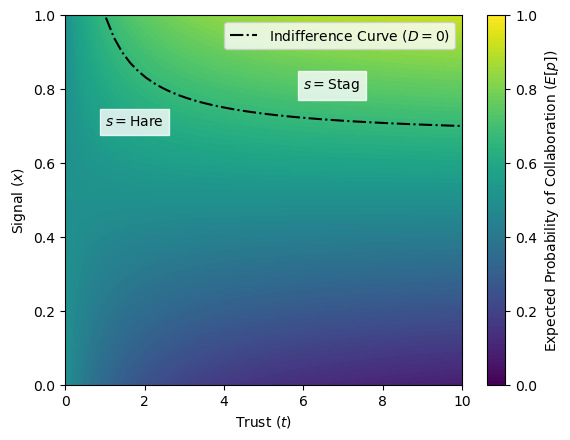

In [111]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 10)
x = np.linspace(0, 1)
T, X = np.meshgrid(t, x)

E_p = np.array([
  [
    (1 + X[i][j] * T[i][j]) / (2 + T[i][j])
    for j in range((len(t)))
  ] 
  for i in range(len(x))
])
x_0 = (2 + np.reciprocal(t)) / 3
x_0[x_0 > 1] = np.nan

cs = plt.contourf(T, X, E_p, levels=np.arange(0,1.01,0.01))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(0,1.2,0.2))
cbar.ax.set_ylabel("Expected Probability of Collaboration ($E[p]$)")
plt.plot(t, x_0, color="k", linestyle="-.", label="Indifference Curve ($D=0$)")
plt.annotate("$s=$Stag", (6, 0.8), backgroundcolor="#ffffffcc")
plt.annotate("$s=$Hare", (1, 0.70), backgroundcolor="#ffffffcc")
plt.xlabel("Trust ($t$)")
plt.ylabel("Signal ($x$)")
plt.legend()
plt.show()

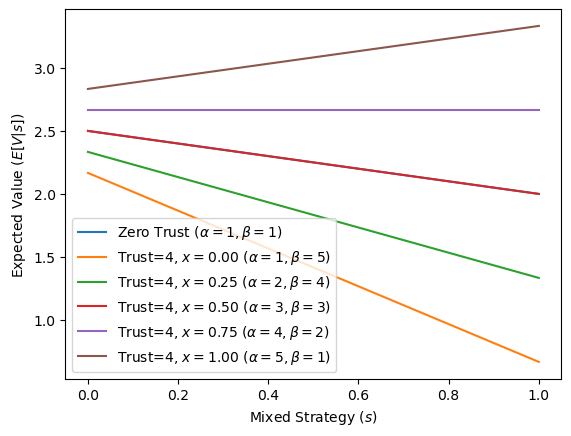

In [21]:
import matplotlib.pyplot as plt
from scipy import stats, integrate
import numpy as np

s = np.linspace(0, 1)

EV_s = (
    s*integrate.quad(lambda p: 4*p*stats.beta.pdf(p, 1, 1), 0, 1)[0] 
    + (1-s)*integrate.quad(lambda p: (2 + p)*stats.beta.pdf(p, 1, 1), 0, 1)[0]
)
plt.plot(s, EV_s, label="Zero Trust ($\\alpha=1, \\beta=1$)")

for i in range(0,5):
    EV_s = (
        s*integrate.quad(lambda p: 4*p*stats.beta.pdf(p, 1+i, 5-i), 0, 1)[0] 
        + (1-s)*integrate.quad(lambda p: (2 + p)*stats.beta.pdf(p, 1+i, 5-i), 0, 1)[0]
    )
    plt.plot(s, EV_s, label=f"Trust=4, $x={i/4:.2f}$ ($\\alpha={1+i}, \\beta={5-i}$)")
plt.xlabel("Mixed Strategy ($s$)")
plt.ylabel("Expected Value ($E[V|s]$)")
plt.legend()
plt.show()

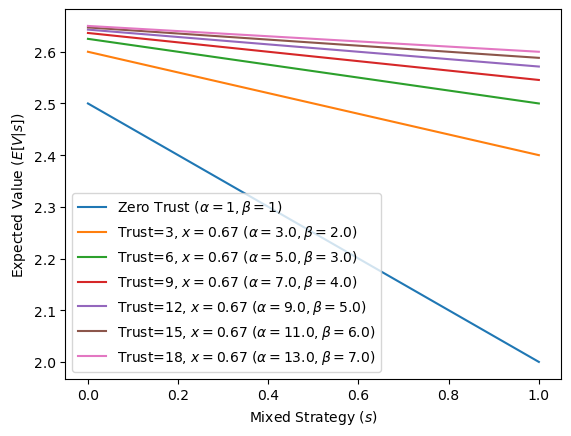

In [22]:
import matplotlib.pyplot as plt
from scipy import stats, integrate
import numpy as np

s = np.linspace(0, 1)

EV_s = (
    s*integrate.quad(lambda p: 4*p*stats.beta.pdf(p, 1, 1), 0, 1)[0] 
    + (1-s)*integrate.quad(lambda p: (2 + p)*stats.beta.pdf(p, 1, 1), 0, 1)[0]
)
plt.plot(s, EV_s, label="Zero Trust ($\\alpha=1, \\beta=1$)")

for i in range(3,19,3):
    EV_s = (
        s*integrate.quad(lambda p: 4*p*stats.beta.pdf(p, 1+2*i/3, 1+i/3), 0, 1)[0] 
        + (1-s)*integrate.quad(lambda p: (2 + p)*stats.beta.pdf(p, 1+2*i/3, 1+i/3), 0, 1)[0]
    )
    plt.plot(
        s,
        EV_s, 
        label=f"Trust={i}, $x={(2*i/3)/i:.2f}$ ($\\alpha={1+2*i/3}, \\beta={1+i/3}$)"
    )
plt.xlabel("Mixed Strategy ($s$)")
plt.ylabel("Expected Value ($E[V|s]$)")
plt.legend()
plt.show()

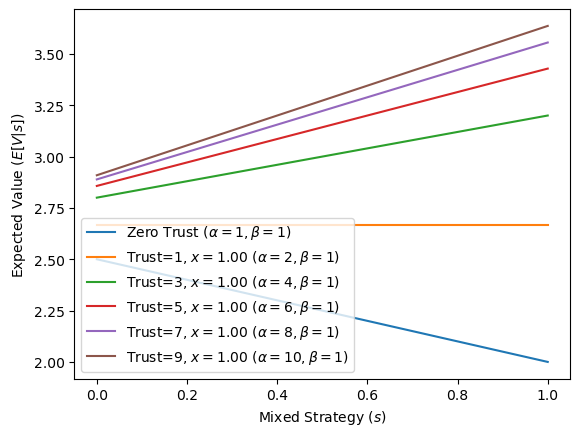

In [23]:
import matplotlib.pyplot as plt
from scipy import stats, integrate
import numpy as np

s = np.linspace(0, 1)

EV_s = (
    s*integrate.quad(lambda p: 4*p*stats.beta.pdf(p, 1, 1), 0, 1)[0] 
    + (1-s)*integrate.quad(lambda p: (2 + p)*stats.beta.pdf(p, 1, 1), 0, 1)[0]
)
plt.plot(s, EV_s, label="Zero Trust ($\\alpha=1, \\beta=1$)")

for i in range(1,11,2):
    EV_s = (
        s*integrate.quad(lambda p: 4*p*stats.beta.pdf(p, 1+i, 1), 0, 1)[0] 
        + (1-s)*integrate.quad(lambda p: (2 + p)*stats.beta.pdf(p, 1+i, 1), 0, 1)[0]
    )
    plt.plot(
        s,
        EV_s, 
        label=f"Trust={i}, $x={1:.2f}$ ($\\alpha={1+i}, \\beta={1}$)"
    )
plt.xlabel("Mixed Strategy ($s$)")
plt.ylabel("Expected Value ($E[V|s]$)")
plt.legend()
plt.show()